## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [3]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 2 heared rows (figure out which one by looking at the output of my 
allfemales['all'].columns a couple of cells below)

In [28]:
##REMOVE
#e.g. http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls
allmales={}
allfemales={}
fnamedict = {'all' : 1, 'white' : 4, 'black' : 6, 
             'asian' : 8, 'hispanic' : 9,
             'f' : (allfemales, 3), 'm' : (allmales, 2)}

for k in ['f', 'm']:
    for race in fnamedict:
        if not race == 'f' and not race == 'm':
            print (race)
            fnamedict[k][0][race] = pd.read_excel(url + 
                                        '/pinc08_%d'%fnamedict[k][1] + 
                                        '_1_%d'%fnamedict[race] + 
                                        '.xls', 
                                        header=(9))
        
#allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
#allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
#allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
#allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
#allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

#allfemales['.....
#[...]

asian
hispanic
black
all
white
asian
hispanic
black
all
white


In [29]:
help(allfemales)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [30]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [31]:
#REMOVE
#allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
#allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
#allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
#allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
#allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [32]:
# Descriptive phase: 
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### black
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%            97.500000             11.500000         11.250000   
50%           511.500000            105.000000         64.500000   
75%          2821.500000            351.500000        185.000000   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%            4.500000          6.250000         

# 2. exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DF
## so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

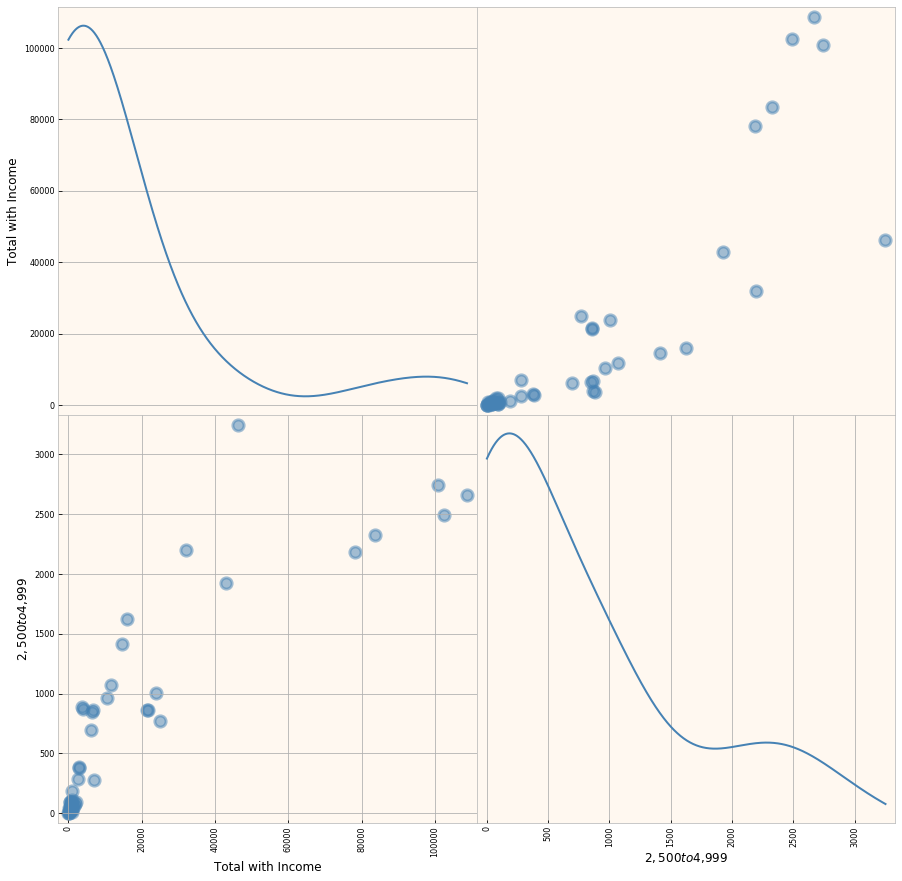

In [33]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [34]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [48]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 


for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

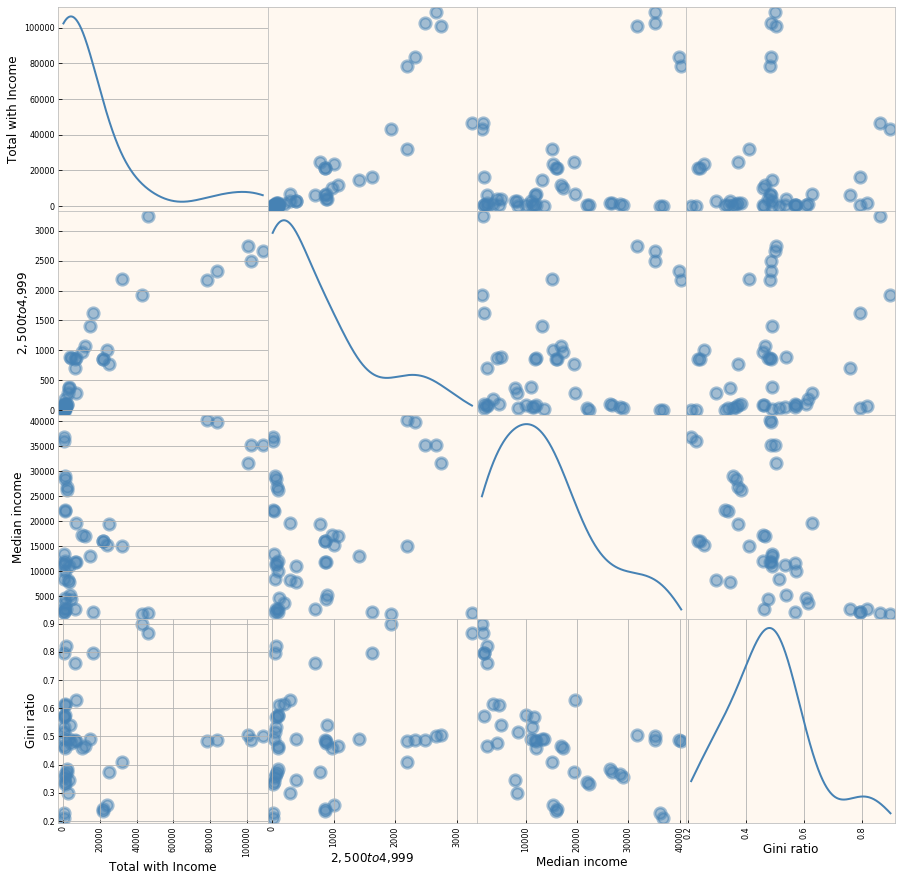

In [49]:
##REMOVE                
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [50]:
# do the same for all female

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [51]:
##plotting the Total median incame by race
##pl.scatter...



24855.0
black
all
white
asian
hispanic


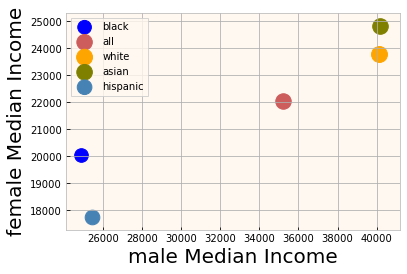

In [60]:
#REMOVE
#plotting the Total median incame by race
col={'all':'IndianRed','white':'Orange',
     'black':'blue','hispanic':'SteelBlue','asian':'olive'}
print (allmales['black']['Median income'][1])
for k,v in col.items():
    print (k)
    pl.scatter(allmales[k]['Median income'][1],
               allfemales[k]['Median income'][1],
               s=150 * allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
               c=col[k], label=k)
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)
pl.legend(loc=2)


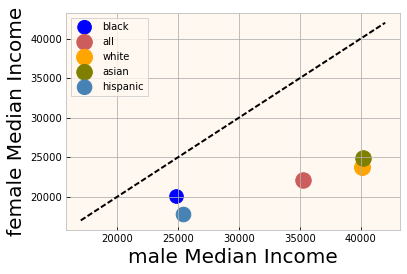

In [61]:
#and adding a 1-1 regression line: how things would be if the income was gender unbiased
for k,v in col.items():
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
pl.plot([17000, 42000], [17000, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)
pl.legend(loc=2)


# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [53]:
#fit and plot here
#[...]

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [67]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

## and plot the line corresponding to the analytical regression to compare it with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

In [ ]:
#[...]


# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex 
here are a few lines of code that should do the trick. ( this is just what I came up with. If you have something better please share!!)
I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also masked the nan values. I broadcase by passing an array of Bools to select the non nan values 

In [70]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())

all_females_allincomes = np.array(
    np.concatenate([allfemales['all']['Median income'][:].values,
                    allfemales['white']['Median income'][:].values,
                    allfemales['black']['Median income'][:].values,
                    allfemales['hispanic']['Median income'][:].values,
                    allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~np.isnan(all_males_allincomes) + ~np.isnan(all_females_allincomes)


Slopes for the regression done with different methods:
	 polyfit 1.00
	 direct residual minimization: 1.00
	 direct residual minimization not forcing 0 intercept: 1.00
	 analytical: nan


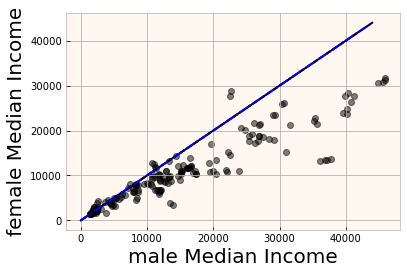

In [75]:
#fit and plot [...]
m = 1
b = 0
from scipy import stats
from scipy.optimize import minimize


pl.scatter(all_males_allincomes[mask], 
           all_females_allincomes[mask], 
           color='k', alpha=0.5)

pl.plot([0, 42000], [0, 42000], 'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


#another way to minimize the residuals
stline = lambda a, x, y: sum((a * x - y)**2)
result = minimize(stline, m, args=(all_males_allincomes[mask], 
                                   all_females_allincomes[mask]))
stline_non0 = lambda a,x,y: sum((a[0]*x + a[1] - y)**2)
par0 = [m,b]
result_non0 = minimize(stline_non0, par0, args=(all_males_allincomes[mask], 
                                                all_females_allincomes[mask]))

#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males_allincomes[mask], 
                      all_females_allincomes[mask])
beta1 = cor[0] * all_females_allincomes[mask].std() / \
                    all_males_allincomes[mask].std()
beta0 = all_females_allincomes[mask].mean() - beta1 * \
                    all_males_allincomes[mask].mean()

print ("Slopes for the regression done with different methods:")
print ("\t polyfit {0:.2f}".format(m))
print ("\t direct residual minimization: " +
       "{0:.2f}".format(result.x[0]))
print ("\t direct residual minimization not " + 
        "forcing 0 intercept: " +
       "{0:.2f}".format(result_non0.x[0]))
print ("\t analytical: {0:.2f}".format(beta1))


pl.plot(range(0,45000,1000), result.x * np.arange(0,45000,1000),
        'k', lw = 2, label="regression through 0")
pl.plot(range(0,45000,1000), beta0 + beta1 * np.arange(0,45000,1000),
        'g', lw = 2, label="analytical regression")
pl.plot(range(0,45000,1000), result_non0.x[1] + 
        result_non0.x[0] * np.arange(0,45000,1000),
        'b-.', lw = 2, label="my regression")



In [ ]:
#is the line fit similar? can you find any high legverage points?

In [ ]:
##remove
##this was my final plot. yours do not have to look like this, this is just an example
#for your convenience.

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)